# Final Assignment 

Take care, that collaboration in solving the assignment is not allowed and can lead to non-passing of the asssigment. I will check the solutions for similarities. Solve the tasks before October 30th 2022. You are only allowed to import the following modules:

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


import statsmodels.api as sm
import statsmodels.formula.api as smf

import pickle

from selenium import webdriver
import json
from selenium.webdriver.common.by import By

## 1. Data preprocessing and plots

**1.1** Import 'players_21.csv' as a pandas data dataframe. Define a column ("year_born") that contains the year of birth of each player as an integer.

In [74]:
import pandas as pd
df=pd.read_csv(r'D:/Backup\Data science/TU DORTMUND/Data science course/4th semester/Python block course/Final Assignment/players_21.csv')
df['year_born'] = df['dob'].apply(lambda df:df.split("-")[0])
print(df['year_born'].astype('int'))

0        1987
1        1985
2        1993
3        1988
4        1992
         ... 
18939    1996
18940    1999
18941    2000
18942    1997
18943    1991
Name: year_born, Length: 18944, dtype: int32


**1.2** Show the most valuable player for each nation ('nationality'). Display the position in the national team ('nation_position'), the name ('short_name'), and the market value in millions.

In [75]:
df['value_millions'] = df['value_eur']/1000000
df_player = df[['nationality','nation_position','short_name','value_millions']].sort_values(by ='value_millions', ascending = False).drop_duplicates(subset='nationality')
print(df_player)

      nationality nation_position      short_name  value_millions
6          France              RM       K. Mbappé          105.50
4          Brazil             NaN       Neymar Jr           90.00
5         Belgium             RCM    K. De Bruyne           87.00
3          Poland             NaN  R. Lewandowski           80.00
10        Senegal             NaN         S. Mané           78.00
...           ...             ...             ...             ...
16819   Hong Kong             NaN    Dai Wai-Tsun            0.18
11530    Ethiopia             NaN        A. Askar            0.16
17422   Nicaragua             NaN       J. Moreno            0.12
15386   Korea DPR             NaN   Ryang Yong Gi            0.07
14664       India             RCM  A. Swaminathan            0.00

[162 rows x 4 columns]


**1.3** Show all Clubs ('club_name') of the "German 1. Bundesliga". Sort them by thier total market value ('value_eur
')in descending order. Display the club name, the total market value and the
size of the squad!

In [76]:
df_league=df[df['league_name']=='German 1. Bundesliga'].groupby('club_name')['value_eur'].agg(market_value='sum',squad_size='count').sort_values('market_value',ascending=False)
print(df_league)

                          market_value  squad_size
club_name                                         
FC Bayern München            609700000          22
Borussia Dortmund            482850000          31
RB Leipzig                   344220000          29
Bayer 04 Leverkusen          303525000          29
Borussia Mönchengladbach     288500000          33
VfL Wolfsburg                214000000          30
TSG 1899 Hoffenheim          200565000          32
Eintracht Frankfurt          196025000          31
Hertha BSC                   189830000          32
FC Schalke 04                158875000          29
SV Werder Bremen             140175000          33
FC Augsburg                  128695000          32
SC Freiburg                  128655000          31
1. FC Köln                   118985000          30
1. FSV Mainz 05              118600000          33
VfB Stuttgart                 96290000          33
1. FC Union Berlin            76100000          29
DSC Arminia Bielefeld         6

**1.4** Filter the dateset for the 1000 most valueable players. Create a new  Plot the minium, the mean, the 99%-quantile,  and the maximum value for each age ('age') group. (Replicate ``'age.pdf'.``)

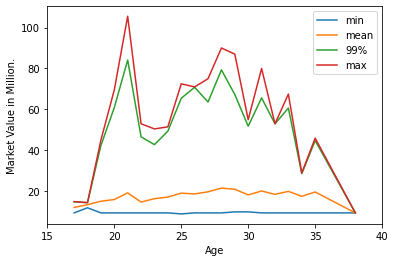

In [77]:
most_valueable_players = df.sort_values(by ='value_millions', ascending = False).head(1000)
most_valueable_players.groupby('age')['value_millions'].min().plot(label = 'min')
most_valueable_players.groupby('age')['value_millions'].mean().plot(label = 'mean')
most_valueable_players.groupby('age')['value_millions'].quantile(0.99).plot(label = '99%')
most_valueable_players.groupby('age')['value_millions'].max().plot(label = 'max')
plt.xlim(15,40)
plt.xlabel("Age")
plt.ylabel("Market Value in Million.")
plt.legend()
plt.show()

***1.5***  Print the the 3 most frequent jersey numbers ('team_jersey_number') for each team postion ('team_position').

In [78]:
most_frequent_jersey_numbers = df[['team_jersey_number','team_position']].groupby('team_position')['team_jersey_number'].value_counts().head(3)

print(most_frequent_jersey_numbers)

team_position  team_jersey_number
CAM            10.0                  72
               11.0                  32
               8.0                   22
Name: team_jersey_number, dtype: int64


***1.5*** Add lines of code in the following template to replicate ``'potential.pdf'``. Explain precisely the line where dot_color is determined and why this determination is not computational efficient.

[('w', 0), ('y', 1), ('c', 5), ('g', 20), ('b', 50), ('k', 100)]


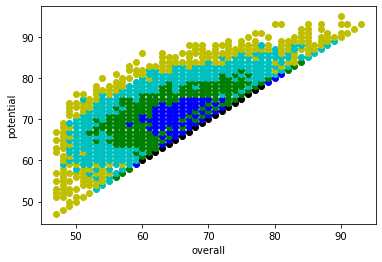

In [14]:
#Create a matrix filled with zeros and dimension 100x100

matrix = np.zeros([100,100])

for ov,pot in zip(df['overall'],df['potential']):
    # Increase the value in the matrix in ov row and the pot column by 1
    matrix[ov][pot]+=1


colors=[('w',0),('y',1),('c',5),('g',20),('b',50),('k',100)]
print(colors)

# Iterate over ov grid
for ov in range(100):
    # Iterate over pot grid
    for pot in range(100):
        # Ignore all iterations where the count is zero
        if (matrix[ov][pot]) != 0:
           
            dot_color = [color for color,value in colors if value<=matrix[ov,pot]][-1]
        # Plot a dot with ov as x,pot as y and dot_color as color
            plt.scatter(ov,pot, c= dot_color)
            

#Add the x and y label

plt.xlabel('overall')
plt.ylabel('potential')

#Save the figure
plt.savefig('potential_copy.pdf')

#Explain
#The reason is that the dot_color executes a conditional statement that compares colors to an OV and a POT matrix, and outputs the color in that index if the values match. This determination is not computationally efficient due to the long running time.

## 2. Regression

***2.1*** Delete all players where the value below the 25% quartile and drop all players that are not playing for a national team ('nation_position').

In [80]:
df['nation_position'].dropna()
Delete_players= df[(df['value_eur'] > df['value_eur'].quantile(0.25)) & (df['nation_position'])]
print(Delete_players)

       sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  https://sofifa.com/player/200389/jan-oblak/210002   
5         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
6         231747  https://sofifa.com/player/231747/kylian-mbappe...   
...          ...                                                ...   
13097     245041  https://sofifa.com/player/245041/chenjie-zhu/2...   
13444     247872  https://sofifa.com/player/247872/rasmus-karjal...   
13447     252024  https://sofifa.com/player/252024/willie-britto...   
13978     240913  https://sofifa.com/player/240913/caoimhin-kell...   
14405     219392  https://sofifa.com/player/219392/alex-rufer/21...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   33   
1      

***2.2*** Regress the logarithmic player value on the overall strength ('overall') and potential ('potential') of the player.  Which player is the most overvalued (highest residual value)?

In [81]:
Delete_players['logarithmic_player_value'] = np.log(Delete_players['value_eur'])
model = smf.ols('logarithmic_player_value ~ overall + potential', data=Delete_players).fit()
Delete_players['predicted'] = model.predict()
Delete_players['residuals'] = (Delete_players['logarithmic_player_value'] - Delete_players['predicted'])
Delete_players.sort_values('residuals', ascending = False)
Delete_players[['short_name','residuals']].drop_duplicates(subset='residuals',keep='first').groupby('residuals').max().sort_values(by ='residuals', ascending = False).head(1)

<ipython-input-81-ae2b05250de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delete_players['logarithmic_player_value'] = np.log(Delete_players['value_eur'])
<ipython-input-81-ae2b05250de4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delete_players['predicted'] = model.predict()
<ipython-input-81-ae2b05250de4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,short_name
residuals,
0.525269,G. Masouras


***2.3*** Plot the residuals and logarithmic player value in scatter plot.

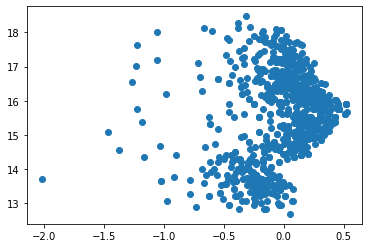

In [82]:
plt.scatter(Delete_players['residuals'],Delete_players['logarithmic_player_value'])

***2.4*** Create a single column for every postion in 'team_position', which is one if a player plays on that postion an zero in all other cases. Regress the logarithmic player value on age, the squared age, Body-Mass-Index and the team position dummies.  Hint: The BMI is ``weight / height**2``.

In [83]:
positions=set()
for pos in Delete_players['team_position']:
    positions.update(pos.split(', '))
print(positions)

Delete_players['LAM'] = Delete_players.team_position.map({'LAM':1}).fillna(0)
Delete_players['LM'] = Delete_players.team_position.map({'LM':1}).fillna(0)
Delete_players['CDM'] = Delete_players.team_position.map({'CDM':1}).fillna(0)
Delete_players['RM']= Delete_players.team_position.map({'RM':1}).fillna(0)
Delete_players['LCB'] = Delete_players.team_position.map({'LCB':1}).fillna(0)
Delete_players['LCM'] = Delete_players.team_position.map({'LCM':1}).fillna(0)
Delete_players['RCB'] = Delete_players.team_position.map({'RCB':1}).fillna(0)
Delete_players['GK'] = Delete_players.team_position.map({'GK':1}).fillna(0)
Delete_players['RS'] = Delete_players.team_position.map({'RS':1}).fillna(0)
Delete_players['RWB'] = Delete_players.team_position.map({'RWB':1}).fillna(0)
Delete_players['RW']= Delete_players.team_position.map({'RW':1}).fillna(0)
Delete_players['RCM'] = Delete_players.team_position.map({'RCM':1}).fillna(0)
Delete_players['LW'] = Delete_players.team_position.map({'LW':1}).fillna(0)
Delete_players['LWB'] = Delete_players.team_position.map({'LWB':1}).fillna(0)
Delete_players['CM'] = Delete_players.team_position.map({'CM':1}).fillna(0)
Delete_players['ST'] = Delete_players.team_position.map({'ST':1}).fillna(0)
Delete_players['RAM'] = Delete_players.team_position.map({'RAM':1}).fillna(0)
Delete_players['CAM'] = Delete_players.team_position.map({'CAM':1}).fillna(0)
Delete_players['CB'] = Delete_players.team_position.map({'CB':1}).fillna(0)
Delete_players['RDM']= Delete_players.team_position.map({'RDM':1}).fillna(0)
Delete_players['RB'] = Delete_players.team_position.map({'RB':1}).fillna(0)
Delete_players['LB'] = Delete_players.team_position.map({'LB':1}).fillna(0)
Delete_players['RES'] = Delete_players.team_position.map({'RES':1}).fillna(0)
Delete_players['LDM'] = Delete_players.team_position.map({'LDM':1}).fillna(0)
Delete_players['LS'] = Delete_players.team_position.map({'LS':1}).fillna(0)
Delete_players['LF']= Delete_players.team_position.map({'LF':1}).fillna(0)
Delete_players['SUB'] = Delete_players.team_position.map({'SUB':1}).fillna(0)

reg1 =  smf.ols('logarithmic_player_value ~ age + age**2', data=Delete_players).fit()

reg2 =  smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2)', data=Delete_players).fit()

reg3 =  smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) + LAM + LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM +CAM +CB +RDM+ RB+ LB+ RES+ LDM+ LS +LF +SUB', data=Delete_players).fit()

reg4 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM +CAM +CB +RDM+ RB+ LB+ RES+ LDM+ LS +LF', data=Delete_players).fit()

reg5 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM +CAM +CB +RDM+ RB+ LB+ RES+ LDM+ LS', data=Delete_players).fit()

reg6 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM +CAM +CB +RDM+ RB+ LB+ RES+ LDM', data=Delete_players).fit()

reg7 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM +CAM +CB +RDM+ RB+ LB+ RES', data=Delete_players).fit()

reg8 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM +CAM +CB +RDM+ RB+ LB', data=Delete_players).fit()

reg9 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM +CAM +CB +RDM+ RB', data=Delete_players).fit()

reg10 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM +CAM +CB +RDM', data=Delete_players).fit()

reg11 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM +CAM +CB', data=Delete_players).fit()

reg12 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM +CAM', data=Delete_players).fit()

reg13 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST +RAM', data=Delete_players).fit()

reg14 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM +ST', data=Delete_players).fit()

reg15 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB+ CM', data=Delete_players).fit()

reg16 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW+ LWB', data=Delete_players).fit()

reg17 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM+ LW', data=Delete_players).fit()

reg18 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW+ RCM', data=Delete_players).fit()

reg19 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB+ RW', data=Delete_players).fit()

reg20 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS +RWB', data=Delete_players).fit()

reg21 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK +RS', data=Delete_players).fit()

reg22 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB+ GK', data=Delete_players).fit()

reg23 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM+ RCB', data=Delete_players).fit()

reg24 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB+ LCM', data=Delete_players).fit()

reg25 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM +LCB', data=Delete_players).fit()

reg26 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM +RM', data=Delete_players).fit()

reg27 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM+ LM+ CDM', data=Delete_players).fit()

reg28 =smf.ols('logarithmic_player_value ~ age + age**2 + (weight_kg / height_cm**2) +LAM', data=Delete_players).fit()


{'SUB', 'RCM', 'GK', 'LCB', 'RDM', 'RES', 'RS', 'RCB', 'LM', 'LWB', 'LAM', 'RB', 'LS', 'ST', 'CM', 'RWB', 'LB', 'CDM', 'LDM', 'LCM', 'CAM', 'RAM', 'CB', 'LW', 'LF', 'RM', 'RW'}


<ipython-input-83-c24a1be07fc0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delete_players['LAM'] = Delete_players.team_position.map({'LAM':1}).fillna(0)
<ipython-input-83-c24a1be07fc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delete_players['LM'] = Delete_players.team_position.map({'LM':1}).fillna(0)
<ipython-input-83-c24a1be07fc0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

***2.5*** Use the same model as in the last task. Now estimate all possible models in which you omit one explanatory variable (position dummies count as single explanatory variables). Which has the highest and lowest influence on the R Squared? (Use a loop!)

In [84]:
r2_dict={1: reg1.rsquared,
         2: reg2.rsquared,
         3: reg3.rsquared,
         4: reg4.rsquared,
         5: reg5.rsquared,
         6: reg6.rsquared,
         7: reg7.rsquared,
         8: reg8.rsquared,
         9: reg9.rsquared,
         10: reg10.rsquared,
         11: reg11.rsquared,
         12: reg12.rsquared,
         13: reg13.rsquared,
         14: reg14.rsquared,
         15: reg15.rsquared,
         16: reg16.rsquared,
         17: reg17.rsquared,
         18: reg18.rsquared,
         19: reg19.rsquared,
         20: reg20.rsquared,
         21: reg21.rsquared,
         22: reg22.rsquared,
         23: reg23.rsquared,
         24: reg24.rsquared,
         25: reg25.rsquared,
         26: reg26.rsquared,
         27: reg27.rsquared,
         28: reg28.rsquared,  
        }
print(pd.Series(r2_dict).sort_values(ascending = False))
R_Squared = list(r2_dict.values())

min_R_Squared, max_R_Squared = R_Squared[0], R_Squared[0]
 
for i in range(1, len(R_Squared)):
   
    if R_Squared[i] < min_R_Squared:
        min_R_Squared = R_Squared[i]
         
    if R_Squared[i] > max_R_Squared:
        max_R_Squared = R_Squared[i]
          
print('Highest influence on the R Squared', max_R_Squared)
print('Lowest influence on the R Squared', min_R_Squared)

3     0.089386
4     0.089386
5     0.088360
6     0.079805
7     0.079186
8     0.075346
9     0.075038
10    0.074239
11    0.067106
12    0.066379
13    0.060664
14    0.059692
15    0.056447
16    0.052785
17    0.052776
18    0.047469
19    0.043347
20    0.040713
21    0.039733
22    0.034930
23    0.034020
24    0.031722
25    0.027189
26    0.026733
27    0.024012
28    0.022946
2     0.022780
1     0.020894
dtype: float64
Highest influence on the R Squared 0.08938631752310977
Lowest influence on the R Squared 0.02089420132784503


In [ ]:
# Model 3 has the highest influence on the R Squared
# Model 1 has the lowest influence on the R Squared

## 3. Password

Create a program that performs the following tasks: (You are only allowed to import time and pickle. Use ``password.py`` as a template.)

1. When you start the program it aks you to enter a password. 

2. The password is stored in a pickle file. If the password is incorrect, it should be requested again. If the password is correct, you can choose between the following options:
    
    2.1. P: Show the information which is stored in 'secret_file.txt'!

    2.2. C: Change the password.

    2.3. L: Lock the program. (Go back to password request.)

    2.4. X: Exit the program.

3. If there is no pickle file with a password, it should ask you to set a new password and then store it into the pickle file.

4. If one enters the wrong password six times in row, it should wait for 10 seconds until it shows the message. 

5. It should check if the password has a minimum length of 10 and if consists of at least one letter and ask for confirmation. It should also print if the requirement is fulfilled.






## 4. Webscraping

Create a program that takes the date in the format MM-DD as an input and queries all people on the English-language Wikipedia (for example https://en.wikipedia.org/wiki/July_12) that are born on that day and saves it in a JSON file. (Note: See ``'07-12.json'`` as an example file.)

In [32]:
chrome_path=r'chromedriver.exe'
driver = webdriver.Chrome(chrome_path)

<ipython-input-32-9eb26d325ffe>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)


In [33]:
date='07-12'
month_list=['January','February','March','April','May','June','July','August','September','October','November','December']
dates ={'January':31,'February':29,'March':31,'April':30,'May':31,'June':30,'July':31,'August':31,'September':30,'October':31,'November':30,'December':31}
link='https://en.wikipedia.org/wiki/July_12'

In [39]:
length_months = len(month_list)
for i in range(length_months):
    j = month_list[i]
    for k in range(1,dates[j]+1):
        
        caths = ['Events','Births','Deaths']
        data=[]
        cath_index=0
        last_year=-10e10
        link =f'https://en.wikipedia.org/wiki/{j}_{k}'
        driver.get(link)
        for element in driver.find_elements(By.TAG_NAME,'li'):
            try:
                text=element.text     
                if ' – '  in text:
                    year= text.split(' – ')[0]
                    year= -int(year[:year.find(' ')]) if 'BC' in year else int(year)
                    person= element.find_element(By.CSS_SELECTOR,'a+a').text
                    discription = text.split(',')[-1].strip()
                    if year<last_year-1000:
                        cath_index+=1
                    last_year=year

                    if caths[cath_index]=='Births':
                        data.append({'Year':year,'Person':person,'Discription':discription})
            except Exception as e:
                print(e)
                pass
            print(data)
        json.dump(data,open(f'{i+1:02d}-{k}.json','w'))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
Message: no such element: Unable to locate element: {"method":"css selector","selector":"a+a"}
  (Session info: chrome=106.0.5249.119)
Stacktrace:
Backtrace:
	Ordinal0 [0x00D1DF13+2219795]
	Ordinal0 [0x00CB2841+1779777]
	Ordinal0 [0x00BC423D+803389]
	Ordinal0 [0x00BF3025+995365]
	Ordinal0 [0x00BF31EB+995819]
	Ordinal0 [0x00BE9531+955697]
	Ordinal0 [0x00C0E844+1108036]
	Ordinal0 [0x00BE94B4+955572]
	Ordinal0 [0x00C0EA14+1108500]
	Ordinal0 [0x00C1F192+1175954]
	Ordinal0 [0x00C0E616+1107478]
	Ordinal0 [0x00BE7F89+950153]
	Ordinal0 [0x00BE8F56+954198]
	GetHandleVerifier [0x01012CB2+3040210]
	GetHandleVerifier [0x01002BB4+2974420]
	GetHandleVerifier [0x00DB6A0A+565546]
	GetHandleVerifier [0x00DB5680+560544]
	Ordinal0 [0x00CB9A5C+1808988]
	Ordinal0 [0x00CBE3A8+1827752]
	Ordinal0 [0x00CBE495+1827989]
	Ordinal0 [0x00CC80A4+1867940]
	BaseThreadInitThunk [0x76426739+25]
	RtlGet

KeyboardInterrupt: 